# Importando as bibliotecas a serem utilizadas nesse trabalho:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Importing modules...")

Importing modules...


# Lendo o arquivo contendo os tamanhos dos arquivos:

In [16]:
print("Reading data...")
df = pd.read_csv("fileSizeComplete.txt", delim_whitespace = True, header = None, names=["Size"])
print("Done")

Reading data...
Done


# Imprimindo o dataframe para verificar se está tudo de acordo.

In [3]:
print("Printing data...")
print(df)

Printing data...
             Size
0               0
1               0
2               0
3               0
4               0
5               0
6               0
7               0
8               0
9               0
10              0
11              0
12              0
13              0
14              0
15              0
16              0
17              0
18              0
19              0
20              0
21              0
22              0
23              0
24              0
25              0
26              0
27              0
28              0
29              0
...           ...
114011    2691188
114012    2698160
114013    2927576
114014    2931836
114015    3155260
114016    3703400
114017    3958864
114018    4163794
114019    4472204
114020    4590984
114021    4593040
114022    4852440
114023    6696416
114024    7210088
114025    7925420
114026    8673920
114027   10332304
114028   12700752
114029   13164116
114030   15562832
114031   21920096
114032   29968732
114033   54

# Média:

In [4]:
def mean(data):
    meanValue = 0
    dataLen = len(data)
    for index in range(dataLen):
        meanValue += data[index]

    return meanValue / dataLen

print("O valor da média dos tamanhos de arquivos é: " + str(mean(df["Size"])))

O valor da média dos tamanhos de arquivos é: 14500.760156434966


# Variância:

In [5]:
def variance(data):
    varianceValue = 0
    meanValue = mean(data)
    dataLen = len(data)
    for index in range(dataLen):
        varianceValue += (data[index] - meanValue) ** 2
        
    return varianceValue / dataLen

print("O valor da variância dos tamanhos de arquivos é: " + str(variance(df["Size"])))

O valor da variância dos tamanhos de arquivos é: 2198416007565.6272


# Desvio Padrão:

In [6]:
def standardDeviation(data):
    deviationValue = 0
    deviationValue = variance(data) ** 0.5
    return deviationValue

print("O valor do desvio padrão dos tamanhos de arquivos é: " + str(standardDeviation(df["Size"])))

O valor do desvio padrão dos tamanhos de arquivos é: 1482705.6375308037


# Coeficiente de Variação:

In [7]:
def coefficientOfVariation(data):
    coefficientOfVariationValue = 0
    coefficientOfVariationValue = standardDeviation(data) / mean(data)
    return coefficientOfVariationValue

print("O valor do coeficiente de variação dos tamanhos de arquivos é: " + str(coefficientOfVariation(df["Size"])))

O valor do coeficiente de variação dos tamanhos de arquivos é: 102.25020078501382


# Moda:

In [9]:
def mode(data):
    df = data.groupby(data).size().reset_index(name='count')
    df = np.array(df.sort_values(["count"]))
    modeValue = df[-1][0]
    modeFrequence = df[-1][1]
    return modeValue,modeFrequence

valorDaModa,frequencia = mode(df["Size"])
print("A moda dos tamanhos de arquivos é: {} e o número de vezes que ela apareceu foi de: {} ".format(valorDaModa,frequencia))

A moda dos tamanhos de arquivos é: 0 e o número de vezes que ela apareceu foi de: 28047 


# Mediana:

In [10]:
def median(data):
    data = np.sort(data)
    medianValue = 0
    dataLen = len(data)
    centerPoint = dataLen / 2
    if dataLen % 2 != 0:
        centerPoint = int(centerPoint + 0.5)
        medianValue = data[centerPoint - 1]
    else:
        centerPoint = int(centerPoint)
        medianValue = (data[centerPoint - 1] + data[centerPoint]) / 2
    
    return medianValue

print("O valor da mediana dos tamanhos de arquivos é: " + str(median(df["Size"])))

O valor da mediana dos tamanhos de arquivos é: 12


# Quartis:

In [11]:
def quartile(x,data):
    data = np.sort(data)
    quartileValue = 0
    dataLen = len(data)
    if x == 1:
        position = np.round(0.25 * (dataLen + 1))
        quartileValue = data[int(position - 1)]
    elif x == 2:
        quartileValue = median(data)
    elif x == 3:
        position = np.round(0.75 * (dataLen + 1))
        quartileValue = data[int(position - 1)]
    return quartileValue

print("O 1º quartil dos tamanhos de arquivos é: " + str(quartile(1,df["Size"])))
print("O 2º quartil(mediana) dos tamanhos de arquivos é: " + str(quartile(2,df["Size"])))
print("O 3º quartil dos tamanhos de arquivos é: " + str(quartile(3,df["Size"])))

O 1º quartil dos tamanhos de arquivos é: 1
O 2º quartil(mediana) dos tamanhos de arquivos é: 12
O 3º quartil dos tamanhos de arquivos é: 56


# Amplitude Inter-quartil:

In [12]:
def interquartileRange(data):
    return quartile(3,data) - quartile(1,data)

print("A amplitude interquartil dos tamanhos de arquivos é: " + str(interquartileRange(df["Size"])))

A amplitude interquartil dos tamanhos de arquivos é: 55


# PDF:

A seguir o plot da PDF.


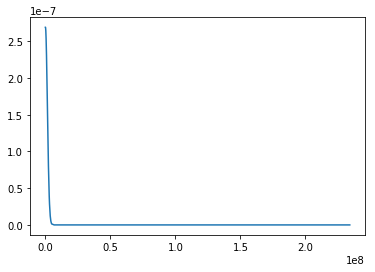

In [13]:
def normal(mean, std, val):
    a = 1/(np.sqrt(2*np.pi)*std)
    diff = np.abs((val-mean) ** 2)
    b = np.exp(-(diff)/(2*std*std))
    return a*b

def pdf(data):
    x = np.sort(data)
    meanValue = mean(data)
    std = standardDeviation(data)
    y = []
    for i in x:
        y.append(normal(meanValue,std,i))
    plt.plot(x,y, label = 'PDF')
    plt.show()

print("A seguir o plot da PDF.")
pdf(df["Size"])

# CDF:

A seguir o plot da CDF.


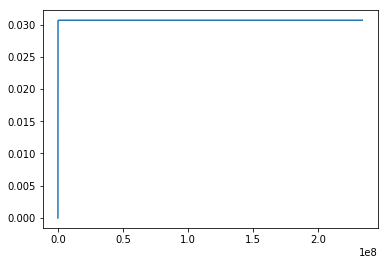

In [14]:
def cdf(data):
    x = np.sort(data)
    meanValue = mean(data)
    std = standardDeviation(data)
    y = []
    yCumulative = 0
    for i in x:
        norm = normal(meanValue,std,i)
        yCumulative += norm
        y.append(yCumulative)
    plt.plot(x,y, label = 'CDF')
    plt.show()
    
print("A seguir o plot da CDF.")
cdf(df["Size"])